# A origem dos Jogadores ⚽

## 1. Introdução

### 1.1 Motivação do Trabalho

Para conhecimento prévio, o projeto, “A Origem dos Jogadores”, tem como inspiração nominal, o livro do Biólogo, Naturalista e Geólogo, Charles Darwin, “A Origem das Espécies”. A análise feita por Darwin foi: animais da mesma espécie podem ramificar em subespécies a partir do contexto geológico e alimentar de uma região? Charles, em quinhentas páginas, explica esse fenômeno e o intitula como: seleção natural. Diante disso, o grupo composto por: José Hermano; Júlia Moraes; Luiz Eduardo e Tiago Petrucci, decidiu nomear o projeto como, “A Origem dos Jogadores”, pois, os jogadores serão analisados em um escopo geral: em todas as posições jogadas; por setores, defensivo, meio-campista e atacante; e em casos individuais específicos, assim também como Darwin fez, em certa maneira, com os estudos oriundos do Arquipélago de Colón e de outras partes do Mundo.

### 1.2 Objetivos de Análise

Nosso grupo tem como objetivos de análise, responder as seguintes perguntas. Qual é o comportamento das posições antagônicas, ou seja, como as características específicas dos jogadores como, por exemplo, goleiros e atacantes, que “teoricamente” são funções opostas dentro do campo. Um visa defender o gol, enquanto, o outro busca fazê-lo. Como se comportam estatisticamente? Hão mais finalizadores ou defensores? Pode enquadrar também os: pontas e laterais, e zagueiros e meias. Quais ou qual é a característica mais importante para um jogador possuir? Quais são, estatisticamente, os melhores jogadores por posição, e também, por característica específica, ou seja, qual é o melhor driblador, baseado completamente em dados? Essas e outras perguntas podem ser respondidas com os dados coletados no projeto.

## 2. Sobre o Dataset

### 2.1 Descrição do Dataset

O Dataset contém os dados dos jogadores, treinadores e times, tanto feminino quanto masculino, do FIFA 15 ao 24. Por uma questão de análise decidimos trabalhar apenas com o arquivo dos jogadores masculinos, devido a sua grande riqueza de informações e número de jogadores.

### 2.2 Exploração Inicial dos Dados

*Importando as Bibliotecas necessárias para trabalhar com o dataset*

In [35]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from scipy import stats
from sklearn.cluster import KMeans

#Importando as funções criadas por nós
import funcoes as fun

Importando o dataset 

In [36]:
data = pd.read_csv('archive/male_players.csv',low_memory=False)

## 3. Pré-processamento do Dataset

### 3.1 Limpeza e tranformação dos dados

#### 3.1.1 Limpeza dos dados

In [37]:
# Verificando se existe valores nulos
display(data.isnull().sum())
display(data.info())

player_id       0
player_url      0
fifa_version    0
fifa_update     0
update_as_of    0
               ..
lcb             0
cb              0
rcb             0
rb              0
gk              0
Length: 109, dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180021 entries, 0 to 180020
Columns: 109 entries, player_id to gk
dtypes: float64(20), int64(43), object(46)
memory usage: 149.7+ MB


None

Não existem valores nulos no nosso dataset. Então não se faz necessária a limpeza nesse aspecto.

#### 3.1.2 Divindo o Dataset por categoria

Fazendo a divisão do Dataset por categorias, selecionando as habilidades mais relevantes por setor.

**Categoria Defensiva**

A categoria defensiva engloba os jogares responsáveis por defender e recuperar a posse da bola. Ela busca, portanto diminuir a amplitude da equipe adversária.

Essa categoria engloba os goleiros, os zagueiros, os laterais e os alas defensivos. 

Para os laterais a velocidade foi considerada como atributo principal, tendo em consideração a necessidade deles em acompanhar os adversários. 

Para os zagueiros foi eleito a noção defensiva, levanndo em consideração sua responsabilidade de proteger a área, impedindo o avanço dos adversários.

Já nos goleiro os reflexos foram atribuídos como habilidade de maior impacto no desempenho.

In [38]:
#Filtrando para que o dataset pegue todas as colunas que contenham ao menos uma dessas posições
busca = "GK|CB|LB|RB|LWB|RWB"

defense_players = data[data["player_positions"].str.contains(busca)]

In [39]:
#Filtrando as categorias importantes
defense_players = defense_players[["fifa_version", "player_positions", "short_name",
                                   "movement_sprint_speed","defending_marking_awareness","goalkeeping_reflexes","overall" ]]

defense_players

,fifa_version,player_positions,short_name,movement_sprint_speed,defending_marking_awareness,goalkeeping_reflexes,overall
6,24.0,GK,T. Courtois,52,20,93,90
9,24.0,GK,Alisson,49,15,89,89
11,24.0,CB,Rúben Dias,69,91,12,89
13,24.0,GK,M. ter Stegen,50,25,91,89
15,24.0,CB,V. van Dijk,87,90,11,89
...,...,...,...,...,...,...,...
180013,15.0,GK,L. Pilling,41,25,45,42
180015,15.0,GK,S. Ramsbottom,40,25,44,42
180016,15.0,CB,E. Redman,66,38,6,41
180018,15.0,"LM, LB",P. Żemło,58,54,9,40


**Categoria de Meio-Campo**

A categoria Meio-Campo engloba os jogares responsáveis pelo jogo rodar.
São parte dela os meia-centrais, os volantes, os meia-abertas e os meia-atacantes.

Para os volantes, meia-centrais e meia-atacantes o passe curto é o atributo mais importante, já que eles são os maiores responsáveis por distribuir os passes. 


Para os meias-abertos, o drible foi considerado um fator de destaque, pois, assim como os pontas, eles frequentemente realizam jogadas individuais

In [40]:
busca = "CDM|LM|RM|CM|CAM"

midfield_players = data[data["player_positions"].str.contains(busca)]

In [41]:

midfield_players = midfield_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_short_passing","dribbling","overall"]]

midfield_players

,fifa_version,player_positions,short_name,attacking_short_passing,dribbling,overall
2,24.0,"CM, CAM",K. De Bruyne,94,87.0,91
3,24.0,"CF, CAM",L. Messi,91,94.0,90
10,24.0,"CDM, CM",Rodri,89,80.0,89
14,24.0,CDM,Casemiro,84,73.0,89
17,24.0,"CM, RW",F. Valverde,87,84.0,88
...,...,...,...,...,...,...
180009,15.0,"LM, ST",L. Davies,37,46.0,43
180012,15.0,"CM, CDM, RM",M. Palmer,44,38.0,42
180014,15.0,CM,M. Maier,47,45.0,42
180018,15.0,"LM, LB",P. Żemło,40,31.0,40


**Categoria Ataque**

A categoria Ataque engloba os jogadores encarregados de finalizar as jogadas. Sendo eles os pontas, centroavantes e segundo-atacantes.

Para os pontas, o drible é a característica de destaque pois, assim como os meia-abertos, eles praticam mais jogadas individuais. Tendo a diferença de que os pontas se destacam pelo drible, jogando principalmente nas laterais para cruzamentos, enquanto os meias-abertos tendem a operar centralmente, participando mais da construção das jogadas.

Para os centroavantes e segundo-atacantes a finalização é o principal, já que eles têm como papel principal finalizar as jogadas, ou seja, fazer o gol.

In [42]:
busca = "LW|ST|RW|CF"

attack_players = data[data["player_positions"].str.contains(busca)]

In [43]:

attack_players = attack_players[["fifa_version", "player_positions", "short_name",
                                   "attacking_finishing","dribbling", "overall"]]

attack_players

,fifa_version,player_positions,short_name,attacking_finishing,dribbling,overall
0,24.0,"ST, LW",K. Mbappé,94,92.0,91
1,24.0,ST,E. Haaland,96,80.0,91
3,24.0,"CF, CAM",L. Messi,89,94.0,90
4,24.0,"CF, ST",K. Benzema,91,87.0,90
5,24.0,ST,R. Lewandowski,93,87.0,90
...,...,...,...,...,...,...
179967,15.0,ST,S. Austin,48,48.0,46
179989,15.0,"ST, RW",J. Allen,45,47.0,45
179996,15.0,ST,A. Peterson,29,53.0,45
180009,15.0,"LM, ST",L. Davies,50,46.0,43


## 4. Desenvolvimento

### 4.1 Boxplt das Posições Por Habilidade ao longo dos anos

#### 4.1.1 Categoria Defensiva

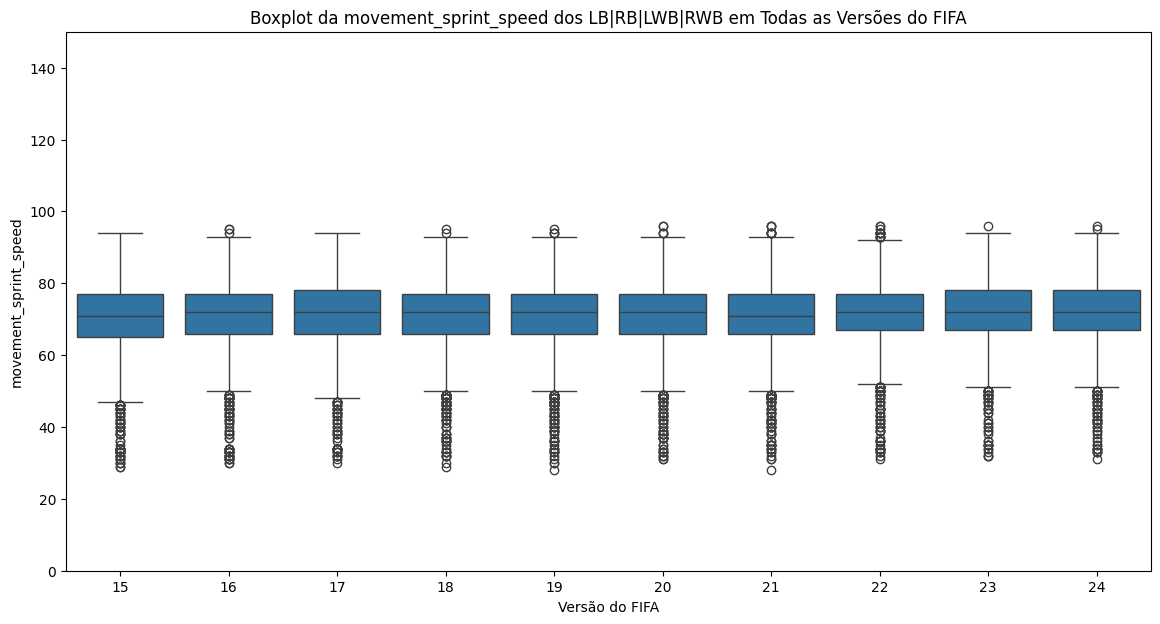

In [44]:

fun.BoxAttribbutes(defense_players, "LB|RB|LWB|RWB", "movement_sprint_speed")


A mediana não teve grandes variações ao decorrer dos anos. No aspecto de outliers dos jogadores laterais em relação as suas velocidades, podemos observar que existem mais jogadores abaixo do limite inferior do que do limite superior. Com isso podemos concluir que laterais muito rápidos são mais raros que laterais muito lentos.

Levando em consideração uma análise geral, podemos afirmar que os laterais obtiveram o pior resultado relação aos outliers devido a grande diferença entre outliers positivos e negativos.

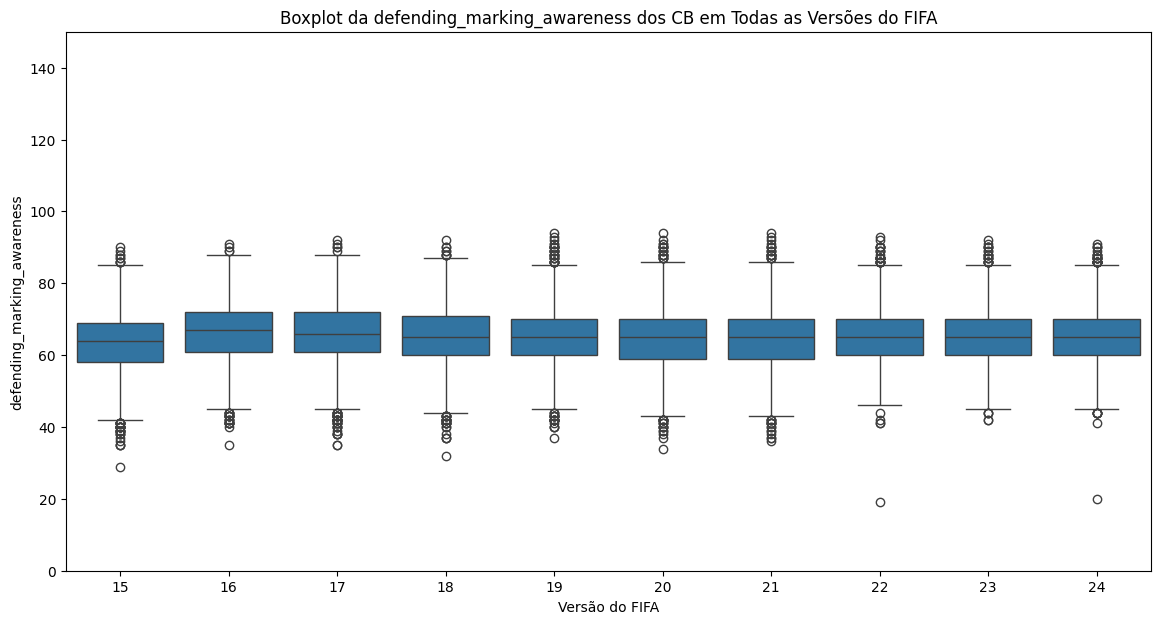

In [45]:
fun.BoxAttribbutes(defense_players,"CB", "defending_marking_awareness")

Novamente, podemos ver que não houve variações nas medianas, sendo as maiores do FIFA 16 e 17. 

Podemos ver que do FIFA 15 ao 18 os outlier são concentrados no limite inferior enquanto, a partir do FIFA 19 houve o crescimento de jogadores acima do limite superior. Mas, uma análise que cabe a todos os FIFAS é quanto melhor os zagueiros melhor sua noção defensiva.

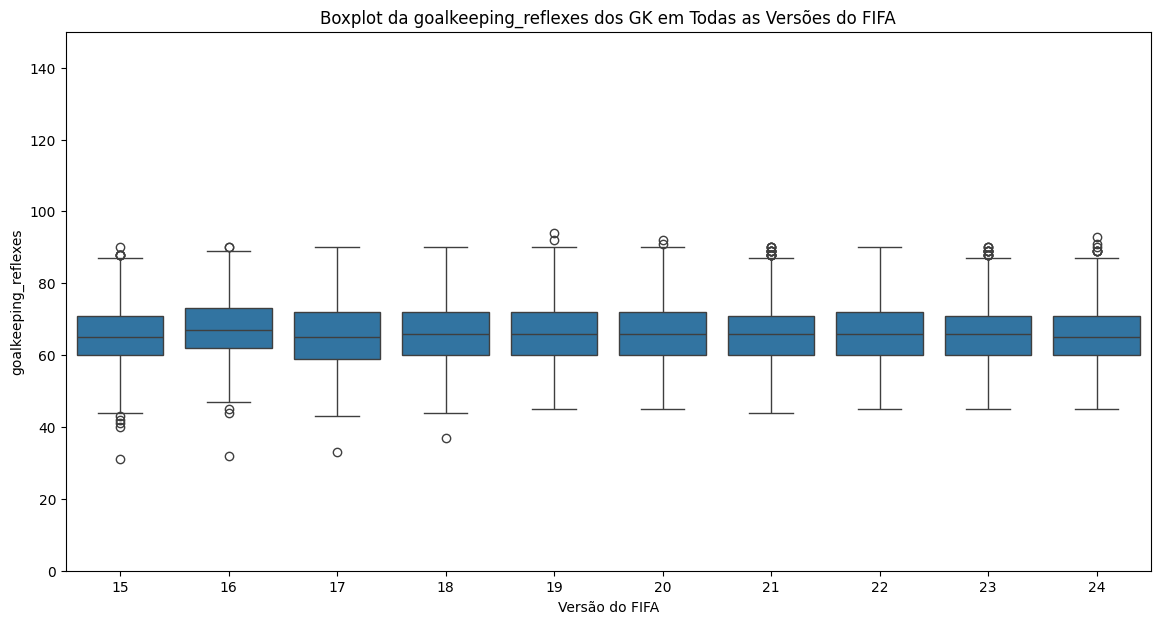

In [46]:
fun.BoxAttribbutes(defense_players,"GK", "goalkeeping_reflexes")

Tendo em vista esse gráfico, pode-se afirmar que os goleiros são mais constantes que as outras posições, por estarem em sua maioria no intervalo dos limites.

#### 4.1.2 Categoria Meio-Campo

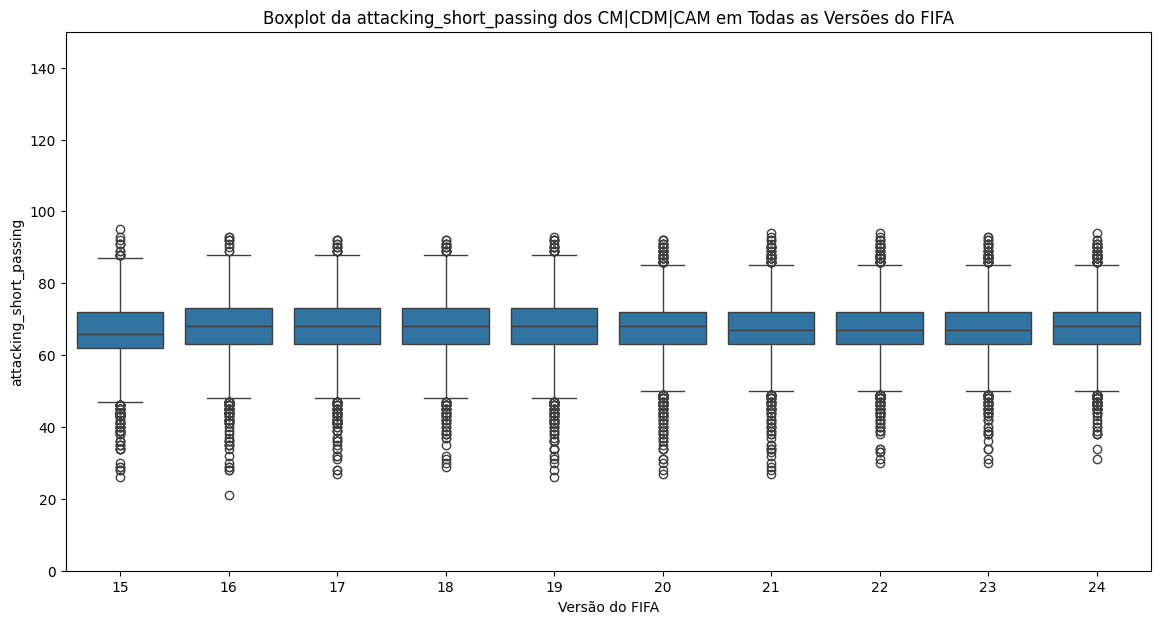

In [47]:
fun.BoxAttribbutes(midfield_players,"CM|CDM|CAM","attacking_short_passing")

O intervalo interquartil dessa categoria foi o menor até então, vemos novamente uma maior concentração no limite inferior. 

Trazendo uma visão técnica, isso se dá porque o passe é considerada uma das habilidades mais difíceis de um jogador refinar, pois além da dificuldade de realizar o passe em si, os jogadores também têm que desenvolver a habilidade de observar o seu entorno e os espaços dados pelo time adversário, além da movimentação do seu próprio time.

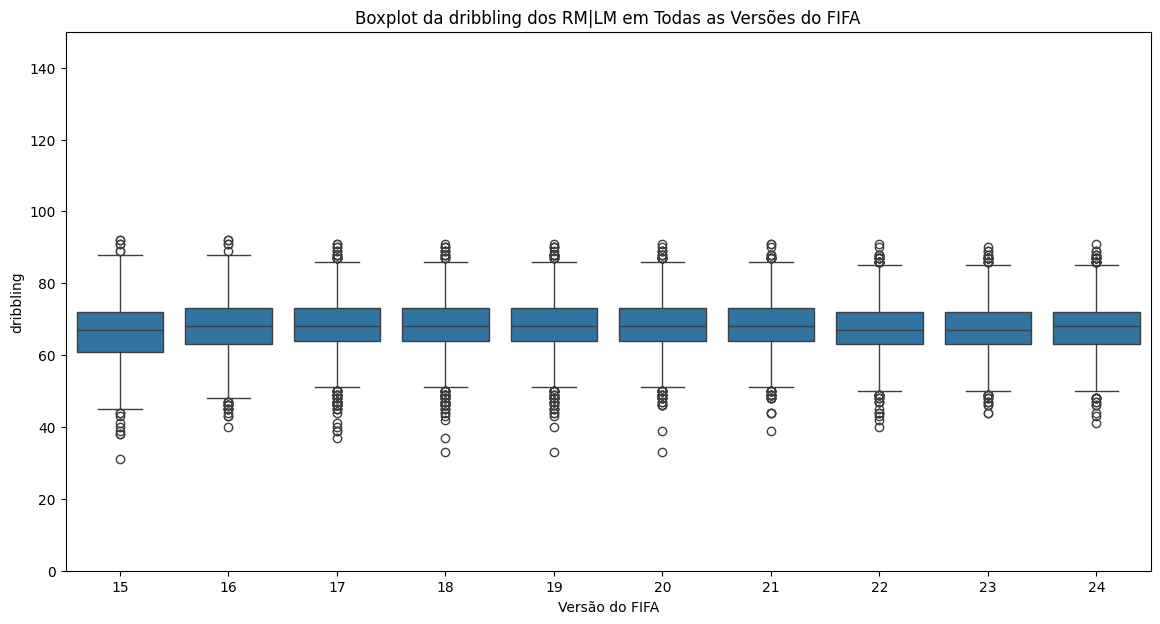

In [48]:
fun.BoxAttribbutes(midfield_players, "RM|LM","dribbling")

Assim como o passe, o drible também é uma habilidade muito única de cada jogador, o que a torna díficil do jogador evoluí-la porque também depende de fatores externos.

#### 4.1.3 Categoria Ataque

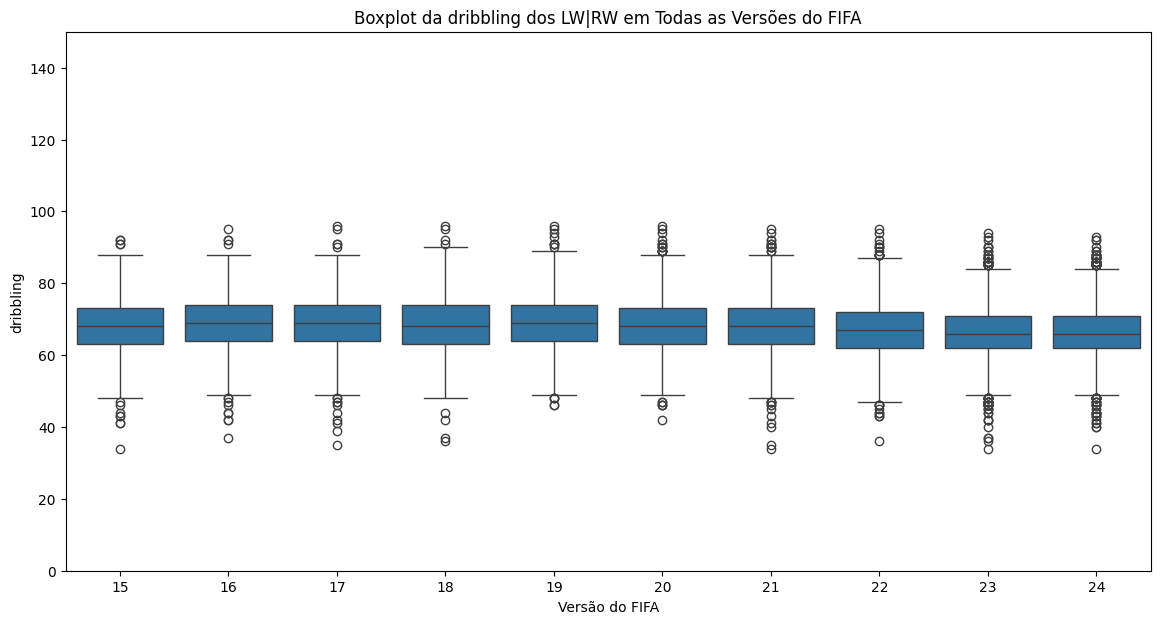

In [49]:
fun.BoxAttribbutes(attack_players,"LW|RW","dribbling")

Comparando com os LM e RM, observamos uma maior constância positiva nos pontas. Isso pode ocorrer devido ao fato de que geralmente os meias-abertos podem ter mais responsabilidades defensivas que os pontas, o que dá aos pontas mais liberdade para as jogadas individuais.

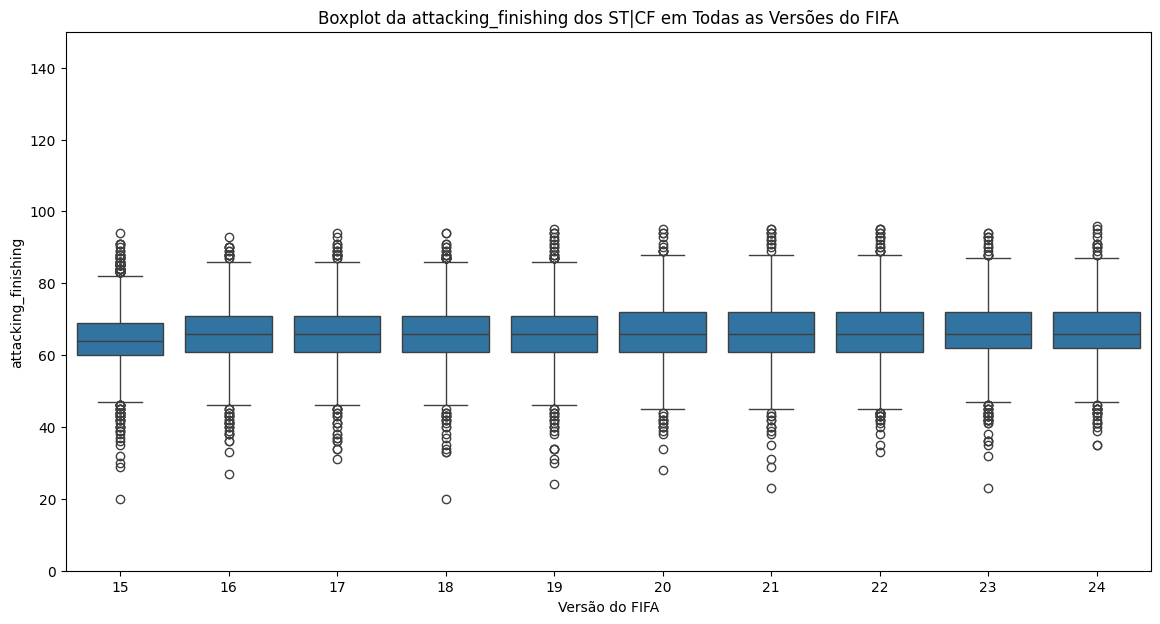

In [51]:
fun.BoxAttribbutes(attack_players,"ST|CF","attacking_finishing")

Olhando esse boxplot vemos uma quantia similar de outliers tanto positivos quanto negativos. Como o passe e o drible, essa também uma habilidade que poucos jogadores conseguem elevar a nível mundial, pelo fator de envolver um misto de noções que um jogador deve possuir para se colocar na melhor posição para finalizar a jogada. 

### 4.2 Qual setor possui a maior média de overall ?

Comparando a média entre os setores, visando descobrir qual setor tem os jogadores com maiores overall.

In [55]:
# Pegando a médoa de overall por setor
media_defensores = np.mean(defense_players["overall"])
media_meias = np.mean(midfield_players["overall"])
media_atacantes = np.mean(attack_players["overall"])


setores = ['Defesa','Meio-Campo','Atacantes']
media_setor = [media_defensores,media_meias,media_atacantes]

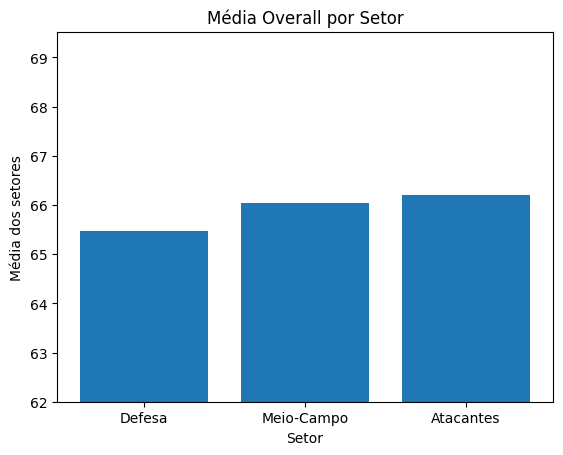

In [57]:
plt.bar(setores,media_setor)
plt.title('Média Overall por Setor')
plt.xlabel('Setor')
plt.ylabel('Média dos setores')

#Facilitar a visualição das diferenças de níveis entre eles
plt.ylim(62,None)
plt.show()

Analisando esse gráfico, podemos observar que o setor de ataque possui a maior média de overall. 

Historicamente a franquia do FIFA tende a dar um overall maior aos atacantes. Por exemplo no 24, que é o FIFA mais atual, temos seis atacantes com 90 mais de overall, enquanto no setor defensivo o overall máximo é 89, embora na vida real os TOP zagueiros mundiais consigam enfrentar os TOP atacante de igual para igual. 

### 4.3 Constância entre os setores

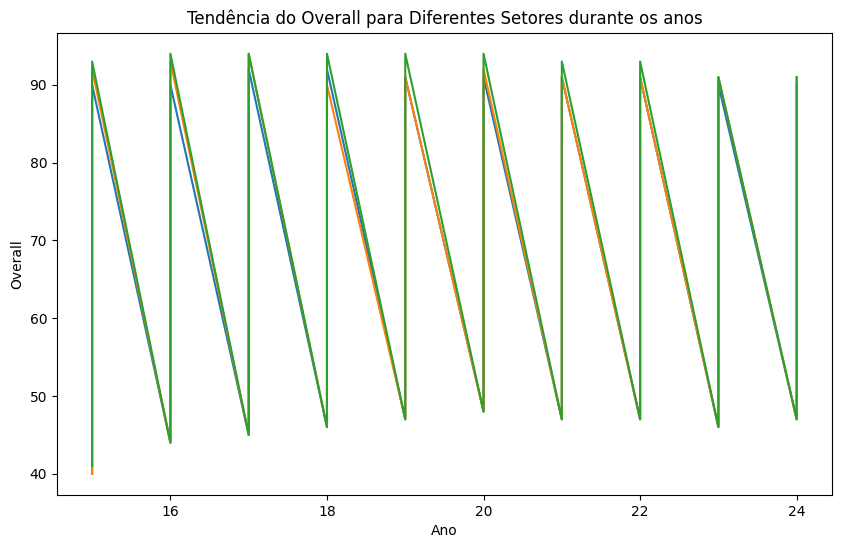

In [58]:
#E linha horizontal hoje
fig, ax = plt.subplots(figsize=(10, 6))

ax.plot(defense_players['fifa_version'],defense_players['overall'],label='Jogadores da Defesa')
ax.plot(midfield_players['fifa_version'],midfield_players['overall'],label='Jogadores de Meio-Campo')
ax.plot(attack_players['fifa_version'],attack_players['overall'],label='Jogadores de Ataque')

ax.set_xlabel('Ano')
ax.set_ylabel('Overall')
ax.set_title('Tendência do Overall para Diferentes Setores durante os anos')

plt.show()

### 4.4 Evolução das Habilidades ao longo dos Anos

#### 4.4.1. Centroavantes 

In [ ]:
#Chamando a função para pegar os melhores 500 atributos por ano 
attack_finishing_df = fun.ComparePlayers("ST", attack_players, "attacking_finishing")

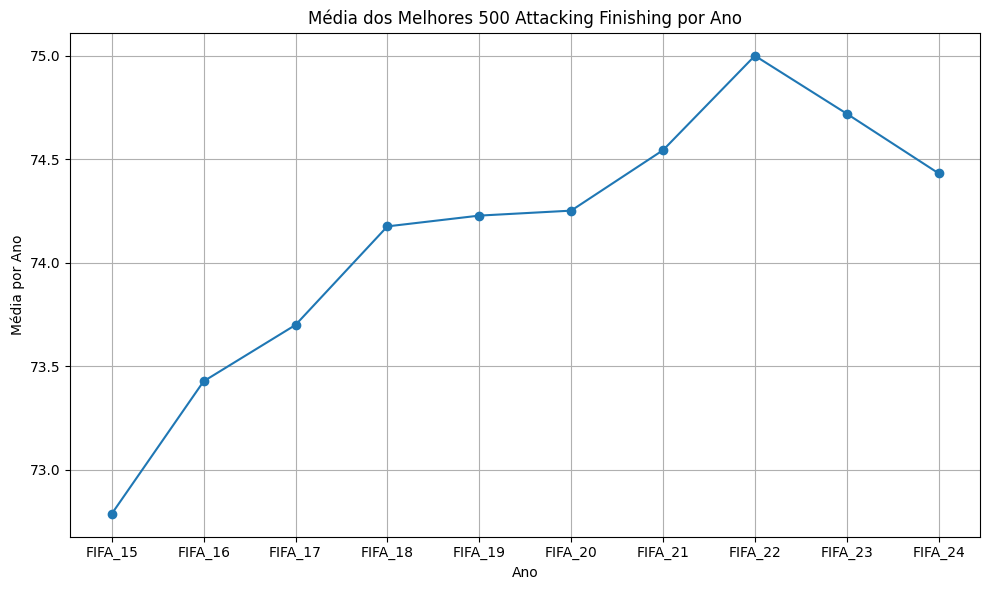

In [59]:
#Gráfico com mostrando a evolução durante os anos 
fun.PlotLineGraph(attack_finishing_df, "Attacking Finishing")


#### 4.4.2. Goleiros

In [ ]:
goal_reflexes_df = fun.ComparePlayers("GK", defense_players, "goalkeeping_reflexes")

In [ ]:
fun.PlotLineGraph(goal_reflexes_df, "Goalkeeping Reflexes")

#### 4.4.3. Zagueiro

In [ ]:
nocao_defensiva_df = fun.ComparePlayers("CB", defense_players, "defending_marking_awareness")

In [ ]:
fun.PlotLineGraph(nocao_defensiva_df,"Defending Marking Awareness")

#### 4.4.4. Meias 

In [ ]:
passe_meias_df = fun.ComparePlayers("CM", midfield_players, "attacking_short_passing")

In [ ]:
fun.PlotLineGraph(passe_meias_df,"Attacking Short Passing")

#### 4.4.5. Pontas Direita

In [ ]:
drible_pontasD_df = fun.ComparePlayers("RW", attack_players, "dribbling")


In [ ]:
fun.PlotLineGraph(drible_pontasD_df, "Dribbling")

#### 4.4.6. Laterais Direito

In [ ]:
pace_lateraisD_df = fun.ComparePlayers("RB", defense_players, "movement_sprint_speed")

In [ ]:
fun.PlotLineGraph(pace_lateraisD_df, "Movement Sprint Speed")

### 4.5 Explorando Agrupamentos

#### 4.5.1. Centroavantes vs Goleiros

In [ ]:

fun.Antagonics(attack_finishing_df,goal_reflexes_df, "CentroAvantes", "Goleiros")

#### 4.5.2. Zagueiros vs Meias

In [ ]:
fun.Antagonics(nocao_defensiva_df,passe_meias_df, "Zagueiros", "Meias")

#### 4.5.3. Laterais vs Pontas

In [ ]:
#Por uma questão de erro optei por transformar nessa etapa o dataset de pontas apenas para int
drible_pontasD_df = drible_pontasD_df.astype(int)

fun.Antagonics(drible_pontasD_df,pace_lateraisD_df,"Laterais","Pontas")